In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import classification_report

import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams

from keras import models, layers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor


import yfinance as yf

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import RandomizedSearchCV
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings 
warnings.filterwarnings('ignore')

date_start = '2018-01-01'
date_end = '2018-12-31'

In [2]:
data = pd.read_csv('csv_files/df.csv')
data.head()

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,...,Volume.15,Volume.16,Volume.17,Volume.18,Volume.19,Volume.20,Volume.21,Volume.22,Volume.23,Volume.24
0,NaN,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,1.7899999618530273,7.0,3.7200000286102295,5.474999904632568,NaN,5.900000095367432,NaN,2.3499999046325684,17.279998779296875,...,44313,54700,145800,46800,9600,173500,4226700,685700,858300,45000
3,2018-01-03,1.8700000047683716,7.150000095367432,4.639999866485596,5.300000190734863,NaN,6.190000057220459,NaN,2.359999895095825,17.08138084411621,...,171293,121800,53900,114300,16500,182200,9911800,681200,1975500,100800
4,2018-01-04,1.8600000143051147,7.050000190734863,4.849999904632568,5.550000190734863,NaN,8.630000114440918,NaN,2.380000114440918,16.783447265625,...,49220,72700,102300,182000,19800,141800,9392600,703700,407700,39900


In [3]:
data_adj_close = pd.read_csv('csv_files/data_adj_close.csv')
data_adj_close.head()

,Date,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
0,2018-01-02,1.79,7.00,3.72,5.475,NaN,5.90,NaN,2.35,17.279999,...,15.150000,1.11,1.24,0.89,3.65,27.969999,52.070000,13.01,2.76,3.98
1,2018-01-03,1.87,7.15,4.64,5.300,NaN,6.19,NaN,2.36,17.081381,...,16.350000,1.19,1.23,0.87,4.00,27.780001,55.439999,13.50,2.84,4.10
2,2018-01-04,1.86,7.05,4.85,5.550,NaN,8.63,NaN,2.38,16.783447,...,15.750000,1.19,1.22,0.87,4.00,28.160000,51.240002,13.00,2.87,4.12
3,2018-01-05,1.96,7.10,4.87,5.600,NaN,8.45,NaN,2.48,17.230345,...,15.750000,1.15,1.21,0.87,4.20,27.080000,46.279999,13.89,2.76,4.20
4,2018-01-08,1.96,6.85,4.55,5.550,NaN,8.76,NaN,2.55,18.124138,...,16.200001,1.17,1.32,0.86,4.10,28.090000,47.470001,13.87,2.93,4.13


In [4]:
data_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 26 columns):
Date    250 non-null object
APPS    250 non-null float64
ARDX    250 non-null float64
ARWR    250 non-null float64
AXSM    250 non-null float64
BTAI    205 non-null float64
CCXI    250 non-null float64
CDLX    223 non-null float64
CFMS    250 non-null float64
DBD     250 non-null float64
DRIO    250 non-null float64
DRRX    250 non-null float64
ENPH    250 non-null float64
EPZM    250 non-null float64
FLGT    250 non-null float64
LEU     250 non-null float64
MBOT    250 non-null float64
MLSS    250 non-null float64
MTNB    250 non-null float64
OESX    250 non-null float64
PESI    250 non-null float64
RETA    250 non-null float64
ROKU    250 non-null float64
SE      250 non-null float64
WKHS    250 non-null float64
XBIT    250 non-null float64
dtypes: float64(25), object(1)
memory usage: 50.9+ KB


In [5]:
data_adj_close['Date'] = pd.to_datetime(data_adj_close['Date'])

In [6]:
data_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 26 columns):
Date    250 non-null datetime64[ns]
APPS    250 non-null float64
ARDX    250 non-null float64
ARWR    250 non-null float64
AXSM    250 non-null float64
BTAI    205 non-null float64
CCXI    250 non-null float64
CDLX    223 non-null float64
CFMS    250 non-null float64
DBD     250 non-null float64
DRIO    250 non-null float64
DRRX    250 non-null float64
ENPH    250 non-null float64
EPZM    250 non-null float64
FLGT    250 non-null float64
LEU     250 non-null float64
MBOT    250 non-null float64
MLSS    250 non-null float64
MTNB    250 non-null float64
OESX    250 non-null float64
PESI    250 non-null float64
RETA    250 non-null float64
ROKU    250 non-null float64
SE      250 non-null float64
WKHS    250 non-null float64
XBIT    250 non-null float64
dtypes: datetime64[ns](1), float64(25)
memory usage: 50.9 KB


In [7]:
data_adj_close.isna().sum()

Date     0
APPS     0
ARDX     0
ARWR     0
AXSM     0
BTAI    45
CCXI     0
CDLX    27
CFMS     0
DBD      0
DRIO     0
DRRX     0
ENPH     0
EPZM     0
FLGT     0
LEU      0
MBOT     0
MLSS     0
MTNB     0
OESX     0
PESI     0
RETA     0
ROKU     0
SE       0
WKHS     0
XBIT     0
dtype: int64

In [8]:
# make the date to to_datetime

data_adj_close['Date'] = pd.to_datetime(data_adj_close['Date'])
data_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 26 columns):
Date    250 non-null datetime64[ns]
APPS    250 non-null float64
ARDX    250 non-null float64
ARWR    250 non-null float64
AXSM    250 non-null float64
BTAI    205 non-null float64
CCXI    250 non-null float64
CDLX    223 non-null float64
CFMS    250 non-null float64
DBD     250 non-null float64
DRIO    250 non-null float64
DRRX    250 non-null float64
ENPH    250 non-null float64
EPZM    250 non-null float64
FLGT    250 non-null float64
LEU     250 non-null float64
MBOT    250 non-null float64
MLSS    250 non-null float64
MTNB    250 non-null float64
OESX    250 non-null float64
PESI    250 non-null float64
RETA    250 non-null float64
ROKU    250 non-null float64
SE      250 non-null float64
WKHS    250 non-null float64
XBIT    250 non-null float64
dtypes: datetime64[ns](1), float64(25)
memory usage: 50.9 KB


In [9]:
data_adj_close.head()

,Date,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
0,2018-01-02,1.79,7.00,3.72,5.475,NaN,5.90,NaN,2.35,17.279999,...,15.150000,1.11,1.24,0.89,3.65,27.969999,52.070000,13.01,2.76,3.98
1,2018-01-03,1.87,7.15,4.64,5.300,NaN,6.19,NaN,2.36,17.081381,...,16.350000,1.19,1.23,0.87,4.00,27.780001,55.439999,13.50,2.84,4.10
2,2018-01-04,1.86,7.05,4.85,5.550,NaN,8.63,NaN,2.38,16.783447,...,15.750000,1.19,1.22,0.87,4.00,28.160000,51.240002,13.00,2.87,4.12
3,2018-01-05,1.96,7.10,4.87,5.600,NaN,8.45,NaN,2.48,17.230345,...,15.750000,1.15,1.21,0.87,4.20,27.080000,46.279999,13.89,2.76,4.20
4,2018-01-08,1.96,6.85,4.55,5.550,NaN,8.76,NaN,2.55,18.124138,...,16.200001,1.17,1.32,0.86,4.10,28.090000,47.470001,13.87,2.93,4.13


In [10]:
data_adj_close.set_index(data_adj_close['Date'], inplace = True)

In [11]:
data_adj_close.head()

,Date,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02,1.79,7.00,3.72,5.475,NaN,5.90,NaN,2.35,17.279999,...,15.150000,1.11,1.24,0.89,3.65,27.969999,52.070000,13.01,2.76,3.98
2018-01-03,2018-01-03,1.87,7.15,4.64,5.300,NaN,6.19,NaN,2.36,17.081381,...,16.350000,1.19,1.23,0.87,4.00,27.780001,55.439999,13.50,2.84,4.10
2018-01-04,2018-01-04,1.86,7.05,4.85,5.550,NaN,8.63,NaN,2.38,16.783447,...,15.750000,1.19,1.22,0.87,4.00,28.160000,51.240002,13.00,2.87,4.12
2018-01-05,2018-01-05,1.96,7.10,4.87,5.600,NaN,8.45,NaN,2.48,17.230345,...,15.750000,1.15,1.21,0.87,4.20,27.080000,46.279999,13.89,2.76,4.20
2018-01-08,2018-01-08,1.96,6.85,4.55,5.550,NaN,8.76,NaN,2.55,18.124138,...,16.200001,1.17,1.32,0.86,4.10,28.090000,47.470001,13.87,2.93,4.13


In [12]:
data_adj_close.drop(['Date'], axis = 1, inplace = True)


In [13]:
data_adj_close.head()

,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,DRIO,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.79,7.00,3.72,5.475,NaN,5.90,NaN,2.35,17.279999,1.61,...,15.150000,1.11,1.24,0.89,3.65,27.969999,52.070000,13.01,2.76,3.98
2018-01-03,1.87,7.15,4.64,5.300,NaN,6.19,NaN,2.36,17.081381,1.61,...,16.350000,1.19,1.23,0.87,4.00,27.780001,55.439999,13.50,2.84,4.10
2018-01-04,1.86,7.05,4.85,5.550,NaN,8.63,NaN,2.38,16.783447,1.61,...,15.750000,1.19,1.22,0.87,4.00,28.160000,51.240002,13.00,2.87,4.12
2018-01-05,1.96,7.10,4.87,5.600,NaN,8.45,NaN,2.48,17.230345,1.62,...,15.750000,1.15,1.21,0.87,4.20,27.080000,46.279999,13.89,2.76,4.20
2018-01-08,1.96,6.85,4.55,5.550,NaN,8.76,NaN,2.55,18.124138,1.65,...,16.200001,1.17,1.32,0.86,4.10,28.090000,47.470001,13.87,2.93,4.13


In [14]:
df = yf.download('APPS', date_start, date_end)
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1.80,1.84,1.77,1.79,1.79,236700
2018-01-03,1.80,1.93,1.79,1.87,1.87,720600
2018-01-04,1.88,1.90,1.82,1.86,1.86,208900
2018-01-05,1.86,1.98,1.85,1.96,1.96,746200
2018-01-08,2.01,2.07,1.92,1.96,1.96,904600


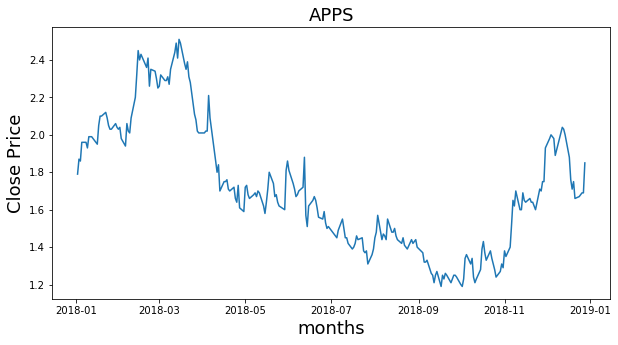

In [15]:
plt.figure(figsize = (10, 5))
plt.title('APPS', fontsize = 18)
plt.xlabel('months', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [16]:
df = df[['Close']]
df.head()

,Close
Date,
2018-01-02,1.79
2018-01-03,1.87
2018-01-04,1.86
2018-01-05,1.96
2018-01-08,1.96


In [17]:
future_days = 100

df['Prediction'] = df[['Close']].shift(-future_days)

df.tail(4)

,Close,Prediction
Date,,
2018-12-24,1.67,NaN
2018-12-26,1.69,NaN
2018-12-27,1.69,NaN
2018-12-28,1.85,NaN


In [18]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[1.78999996]
 [1.87      ]
 [1.86000001]
 [1.96000004]
 [1.96000004]
 [1.92999995]
 [1.99000001]
 [1.99000001]
 [1.99000001]
 [1.95000005]
 [2.04999995]
 [2.0999999 ]
 [2.0999999 ]
 [2.11999989]
 [2.08999991]
 [2.04999995]
 [2.02999997]
 [2.02999997]
 [2.05999994]
 [2.03999996]
 [2.02999997]
 [2.03999996]
 [1.98000002]
 [1.94000006]
 [2.05999994]
 [2.01999998]
 [2.00999999]
 [2.08999991]
 [2.20000005]
 [2.31999993]
 [2.45000005]
 [2.4000001 ]
 [2.43000007]
 [2.3599999 ]
 [2.41000009]
 [2.25999999]
 [2.3499999 ]
 [2.33999991]
 [2.29999995]
 [2.25      ]
 [2.25999999]
 [2.31999993]
 [2.28999996]
 [2.28999996]
 [2.30999994]
 [2.26999998]
 [2.3499999 ]
 [2.44000006]
 [2.49000001]
 [2.41000009]
 [2.50999999]
 [2.49000001]
 [2.38000011]
 [2.3499999 ]
 [2.3900001 ]
 [2.30999994]
 [2.27999997]
 [2.1099999 ]
 [2.07999992]
 [2.01999998]
 [2.00999999]
 [2.00999999]
 [2.01999998]
 [2.01999998]
 [2.21000004]
 [2.08999991]
 [1.91999996]
 [1.86000001]
 [1.79999995]
 [1.84000003]
 [1.70000005]
 [1.75

In [19]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[1.62       1.60000002 1.80999994 1.86000001 1.80999994 1.74000001
 1.71000004 1.66999996 1.67999995 1.70000005 1.72000003 1.88
 1.57000005 1.50999999 1.62       1.64999998 1.66999996 1.64999998
 1.61000001 1.55999994 1.54999995 1.59000003 1.52999997 1.5
 1.50999999 1.48000002 1.47000003 1.45000005 1.49000001 1.54999995
 1.5        1.45000005 1.45000005 1.41999996 1.38999999 1.39999998
 1.41999996 1.46000004 1.44000006 1.45000005 1.38       1.37
 1.38       1.30999994 1.36000001 1.38999999 1.45000005 1.48000002
 1.57000005 1.44000006 1.47000003 1.46000004 1.44000006 1.54999995
 1.48000002 1.48000002 1.5        1.46000004 1.44000006 1.41999996
 1.45000005 1.40999997 1.39999998 1.38999999 1.44000006 1.41999996
 1.42999995 1.44000006 1.39999998 1.37       1.32000005 1.32000005
 1.33000004 1.25999999 1.25       1.21000004 1.25       1.26999998
 1.19000006 1.25       1.23000002 1.25999999 1.25       1.21000004
 1.23000002 1.25       1.25       1.24000001 1.20000005 1.19000006
 1.23000002 1.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [21]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [22]:
x_future = df.drop(['Prediction'], 1)[:-future_days]

x_future = x_future.tail(future_days)

x_future = np.array(x_future)
x_future

array([[2.50999999],
       [2.49000001],
       [2.38000011],
       [2.3499999 ],
       [2.3900001 ],
       [2.30999994],
       [2.27999997],
       [2.1099999 ],
       [2.07999992],
       [2.01999998],
       [2.00999999],
       [2.00999999],
       [2.01999998],
       [2.01999998],
       [2.21000004],
       [2.08999991],
       [1.91999996],
       [1.86000001],
       [1.79999995],
       [1.84000003],
       [1.70000005],
       [1.75      ],
       [1.75      ],
       [1.75999999],
       [1.71000004],
       [1.70000005],
       [1.72000003],
       [1.65999997],
       [1.63999999],
       [1.73000002],
       [1.61000001],
       [1.59000003],
       [1.72000003],
       [1.73000002],
       [1.67999995],
       [1.65999997],
       [1.67999995],
       [1.69000006],
       [1.66999996],
       [1.70000005],
       [1.69000006],
       [1.62      ],
       [1.58000004],
       [1.63999999],
       [1.71000004],
       [1.79999995],
       [1.74000001],
       [1.669

In [23]:
# show tree model prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
print('mse',mean_squared_error(x_future, tree_prediction))

[1.57000005 1.57000005 1.44000006 1.45000005 1.48000002 1.48000002
 1.5        1.88       1.44000006 1.39999998 1.39999998 1.39999998
 1.39999998 1.39999998 1.44000006 1.435      1.42999995 1.54333333
 1.31999999 1.37       1.30999994 1.32500005 1.32500005 1.32500005
 1.29       1.30999994 1.25       1.67500001 1.29666666 1.21000004
 1.41500002 1.64999998 1.25       1.21000004 1.25749999 1.67500001
 1.25749999 1.23000002 1.21500003 1.30999994 1.23000002 1.51999998
 1.35000002 1.29666666 1.29       1.31999999 1.21000004 1.21500003
 1.25749999 1.29666666 1.51999998 1.64999998 1.33500004 1.54333333
 1.33500004 1.21000004 1.29       1.21500003 1.25749999 1.30999994
 1.25       1.54333333 1.35000002 1.39999998 1.51999998 1.67500001
 1.21500003 1.67500001 1.41500002 1.60000002 1.72000003 1.64999998
 1.63999999 1.70499998 1.39999998 1.66500002 1.60000002 1.91249999
 1.70000005 1.72000003 1.70499998 1.91249999 1.91249999 1.99000001
 1.81999999 1.88999999 1.99000001 2.00999999 1.94499999 1.9124

In [24]:
# show linear regression prediction

lr_prediction = lr.predict(x_future)
print(lr_prediction)
print('mse', mean_squared_error(x_future, lr_prediction))

[1.36492881 1.37008686 1.39845614 1.40619327 1.39587711 1.41650937
 1.42424645 1.46808994 1.47582701 1.49130116 1.49388019 1.49388019
 1.49130116 1.49130116 1.44229962 1.47324799 1.51709144 1.5325656
 1.54803978 1.53772365 1.57383003 1.5609349  1.5609349  1.55835588
 1.571251   1.57383003 1.56867198 1.58414616 1.58930421 1.56609295
 1.59704128 1.60219933 1.56867198 1.56609295 1.57898811 1.58414616
 1.57898811 1.57640905 1.58156713 1.57383003 1.57640905 1.59446226
 1.60477836 1.58930421 1.571251   1.54803978 1.56351393 1.58156713
 1.57898811 1.58930421 1.59446226 1.59962031 1.54546075 1.5325656
 1.54546075 1.56351393 1.571251   1.58156713 1.57898811 1.57383003
 1.56867198 1.52740754 1.60735738 1.62283157 1.59446226 1.58672518
 1.58156713 1.58672518 1.59704128 1.60993644 1.61251547 1.60219933
 1.61767352 1.62541059 1.62283157 1.63056864 1.63314767 1.63830572
 1.62798962 1.61251547 1.62541059 1.63830572 1.63830572 1.64604282
 1.6537799  1.65120087 1.64604282 1.63572669 1.64088474 1.638305

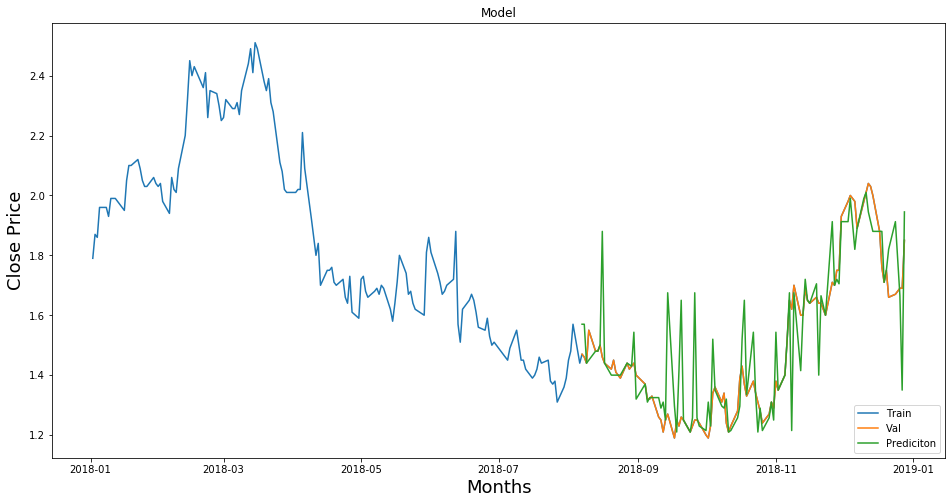

In [38]:
# plotting the Decision tree prediction

predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Months', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediciton'], loc = 'lower right')
plt.show()


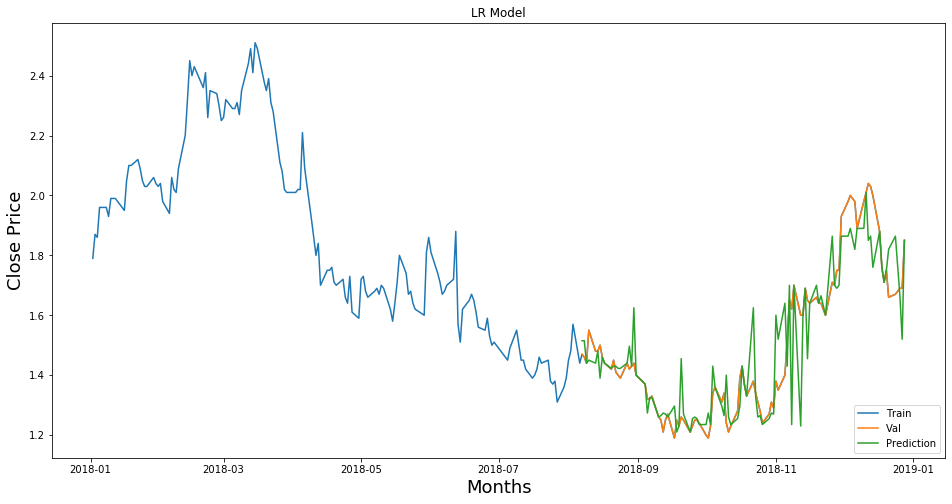

In [28]:
# plotting Linear regression model

predictins = lr_prediction
valid_lr = df[X.shape[0]:]
valid_lr['Prediction'] = predictions

plt.figure(figsize = (16, 8))
plt.title('LR Model')
plt.xlabel('Months', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.plot(valid_lr[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc = 'lower right')
plt.show()

In [29]:
tickers =  data_adj_close.columns.values.tolist()

In [30]:
tickers

['APPS',
 'ARDX',
 'ARWR',
 'AXSM',
 'BTAI',
 'CCXI',
 'CDLX',
 'CFMS',
 'DBD',
 'DRIO',
 'DRRX',
 'ENPH',
 'EPZM',
 'FLGT',
 'LEU',
 'MBOT',
 'MLSS',
 'MTNB',
 'OESX',
 'PESI',
 'RETA',
 'ROKU',
 'SE',
 'WKHS',
 'XBIT']

In [31]:
df = yf.download(tickers, date_start, date_end)['Close']
df.head()


[*********************100%***********************]  25 of 25 completed


,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,DRIO,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.79,7.00,3.72,5.475,NaN,5.90,NaN,2.35,17.400000,1.61,...,15.150000,1.11,1.24,0.89,3.65,27.969999,52.070000,13.01,2.76,3.98
2018-01-03,1.87,7.15,4.64,5.300,NaN,6.19,NaN,2.36,17.200001,1.61,...,16.350000,1.19,1.23,0.87,4.00,27.780001,55.439999,13.50,2.84,4.10
2018-01-04,1.86,7.05,4.85,5.550,NaN,8.63,NaN,2.38,16.900000,1.61,...,15.750000,1.19,1.22,0.87,4.00,28.160000,51.240002,13.00,2.87,4.12
2018-01-05,1.96,7.10,4.87,5.600,NaN,8.45,NaN,2.48,17.350000,1.62,...,15.750000,1.15,1.21,0.87,4.20,27.080000,46.279999,13.89,2.76,4.20
2018-01-08,1.96,6.85,4.55,5.550,NaN,8.76,NaN,2.55,18.250000,1.65,...,16.200001,1.17,1.32,0.86,4.10,28.090000,47.470001,13.87,2.93,4.13


In [32]:
df.describe()

,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,DRIO,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
count,250.000000,250.000000,250.000000,250.000000,205.000000,250.000000,223.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.709040,4.494240,11.426800,3.088380,8.245107,11.228880,18.683318,1.205556,10.231560,1.302424,...,9.538240,0.769640,0.709628,0.887600,4.103240,46.997820,45.568240,12.938480,1.884380,4.275980
std,0.340393,1.337336,4.316331,0.567486,2.289905,1.528833,3.754678,0.455474,5.477905,0.326244,...,4.096509,0.176076,0.258429,0.120856,0.627952,21.639140,11.722617,1.627187,0.907389,0.586772
min,1.190000,1.660000,3.720000,2.000000,2.410000,5.900000,10.400000,0.372000,2.500000,0.660000,...,1.420000,0.280000,0.353000,0.550000,2.030000,19.940001,27.170000,10.340000,0.430000,2.310000
25%,1.440000,3.850000,6.955000,2.642500,6.270000,10.100000,14.890000,0.936250,4.435000,1.000000,...,6.157500,0.700000,0.470250,0.800000,3.800000,27.627500,36.435000,11.492500,1.055000,4.040000
50%,1.670000,4.250000,12.380000,3.105000,8.820000,11.170000,19.209999,1.240000,12.050000,1.380000,...,10.575000,0.785000,0.690000,0.870000,4.300000,38.805000,42.965000,12.810000,1.785000,4.305000
75%,1.980000,5.350000,14.662500,3.368750,10.170000,12.357500,21.020000,1.390000,15.150000,1.560750,...,12.450000,0.880000,0.926750,0.977500,4.500000,63.385001,51.992499,14.237500,2.767500,4.690000
max,2.510000,7.900000,20.299999,5.600000,12.990000,14.990000,27.650000,2.620000,18.799999,1.860000,...,16.350000,1.190000,1.320000,1.200000,5.100000,92.059998,76.480003,16.530001,3.350000,6.270000


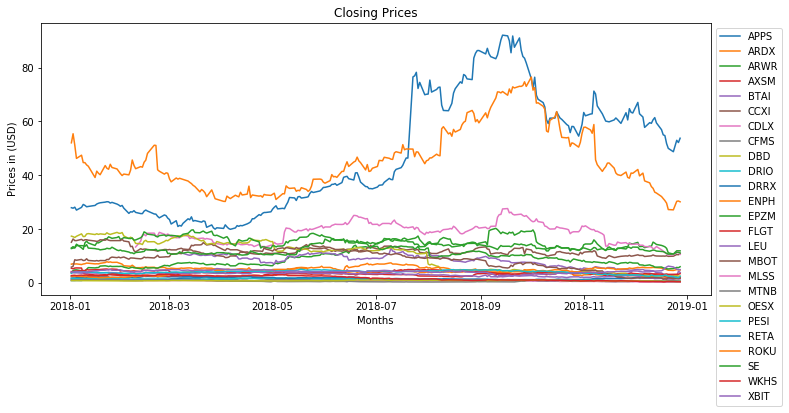

In [33]:
plt.figure(figsize = (12, 5))

for i in df.columns.values:
    plt.plot(df[i], label = i)

plt.title('Closing Prices')
plt.xlabel('Months')
plt.ylabel('Prices in (USD)')
plt.legend(df.columns.values, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()

In [34]:
# normalizing data w ith min-max scaler so that all values are between 0 and 100

min_max = MinMaxScaler(feature_range = (0, 100))
scaled = min_max.fit_transform(df)
scaled

array([[45.45454053, 85.57692185,  0.        , ..., 43.13408475,
        79.79452278, 42.17171869],
       [51.51515015, 87.98076948,  5.54885333, ..., 51.05007391,
        82.53424629, 45.2020188 ],
       [50.75757507, 86.37820694,  6.81543987, ..., 42.97253018,
        83.56164261, 45.70706882],
       ...,
       [37.87878979,  1.28205194, 49.69843428, ..., 16.96284491,
         3.1506853 , 71.96969387],
       [37.87878979,  0.32051251, 49.75874929, ..., 17.12438408,
         3.08219099, 66.91919368],
       [50.        ,  1.60256445, 49.57780425, ..., 13.08561221,
         2.39726011, 66.91919368]])

In [35]:
df_scaled = pd.DataFrame(scaled, columns = df.columns)

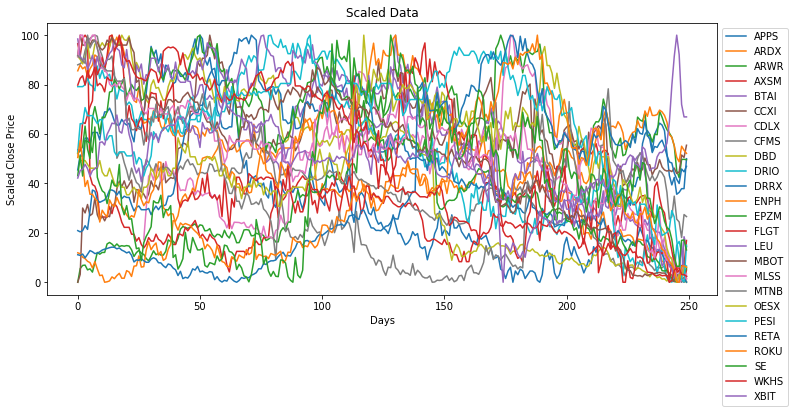

In [36]:
# plotting the scaled data

plt.figure(figsize = (12, 5))

for i in df_scaled.columns.values:
    plt.plot(df_scaled[i], label = i)
    
plt.title('Scaled Data')
plt.xlabel('Days')
plt.ylabel('Scaled Close Price')
plt.legend(df_scaled.columns.values, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()

In [37]:
#. with this many stocks its hard to see when the values are normalized

In [38]:
df_return = df.pct_change(1)
df_return

,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,DRIO,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.044693,0.021429,0.247312,-0.031963,NaN,0.049153,NaN,0.004255,-0.011494,0.000000,...,0.079208,0.072072,-0.008065,-0.022472,0.095890,-0.006793,0.064721,0.037663,0.028985,0.030151
2018-01-04,-0.005348,-0.013986,0.045259,0.047170,NaN,0.394184,NaN,0.008475,-0.017442,0.000000,...,-0.036697,0.000000,-0.008130,0.000000,0.000000,0.013679,-0.075758,-0.037037,0.010563,0.004878
2018-01-05,0.053763,0.007092,0.004124,0.009009,NaN,-0.020858,NaN,0.042017,0.026627,0.006211,...,0.000000,-0.033614,-0.008197,0.000000,0.050000,-0.038352,-0.096799,0.068462,-0.038327,0.019417
2018-01-08,0.000000,-0.035211,-0.065708,-0.008929,NaN,0.036686,NaN,0.028226,0.051873,0.018519,...,0.028571,0.017391,0.090909,-0.011494,-0.023810,0.037297,0.025713,-0.001440,0.061594,-0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.051429,-0.040000,-0.128982,-0.026549,-0.015444,-0.019802,-0.041475,-0.060748,-0.066667,0.200000,...,0.331034,-0.117647,-0.130435,-0.051724,-0.102113,-0.034370,-0.080243,-0.022748,0.052632,0.057336
2018-12-24,0.006024,-0.011905,-0.041927,-0.022727,0.090196,0.006061,0.009615,-0.029851,0.003968,0.021429,...,-0.139896,-0.066667,-0.018333,0.036364,-0.094118,-0.024995,-0.004032,0.000000,-0.005000,-0.049442
2018-12-26,0.011976,0.048193,0.113594,-0.046512,-0.133093,0.062249,0.075238,-0.046154,0.086957,-0.058275,...,-0.036145,0.035714,-0.103565,-0.017544,-0.103896,0.086957,0.117041,0.060521,-0.125628,-0.134228


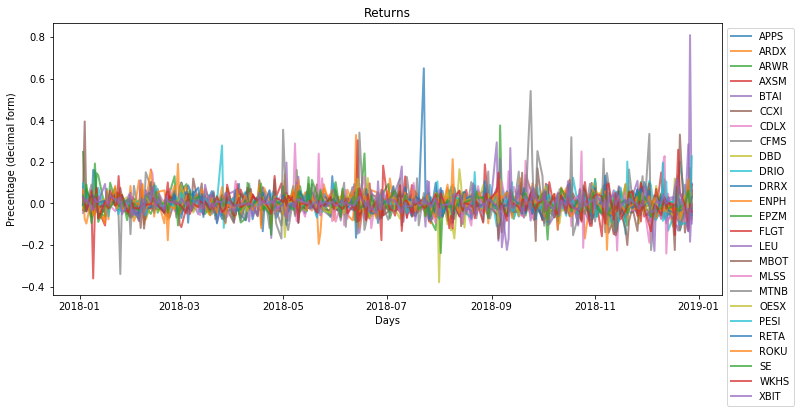

In [39]:
plt.figure(figsize = (12, 5))

for i in df_return.columns.values:
    plt.plot(df_return.index, df_return[i], label = i, lw = 2, alpha = .7)
    
plt.title('Returns')
plt.ylabel('Precentage (decimal form)')
plt.xlabel('Days')
plt.legend(df_return.columns.values, loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

In [40]:
df_return.std()

APPS    0.037487
ARDX    0.040792
ARWR    0.056590
AXSM    0.048059
BTAI    0.077631
CCXI    0.047896
CDLX    0.045493
CFMS    0.054972
DBD     0.049797
DRIO    0.052734
DRRX    0.040495
ENPH    0.052347
EPZM    0.042322
FLGT    0.042743
LEU     0.053725
MBOT    0.051850
MLSS    0.056201
MTNB    0.080806
OESX    0.032946
PESI    0.037106
RETA    0.054602
ROKU    0.043925
SE      0.034472
WKHS    0.049473
XBIT    0.041393
dtype: float64

In [41]:
# the most risky stock to invest in is MTNB

In [42]:
df_return.mean()

APPS    0.000831
ARDX   -0.004679
ARWR    0.006203
AXSM   -0.002468
BTAI   -0.002573
CCXI    0.003573
CDLX   -0.000029
CFMS   -0.005752
DBD    -0.006412
DRIO   -0.001774
DRRX   -0.001634
ENPH    0.003802
EPZM   -0.002101
FLGT    0.000088
LEU    -0.002478
MBOT   -0.007175
MLSS   -0.003551
MTNB    0.000122
OESX   -0.001115
PESI   -0.000864
RETA    0.003867
ROKU   -0.001213
SE     -0.000031
WKHS   -0.005621
XBIT    0.001737
dtype: float64

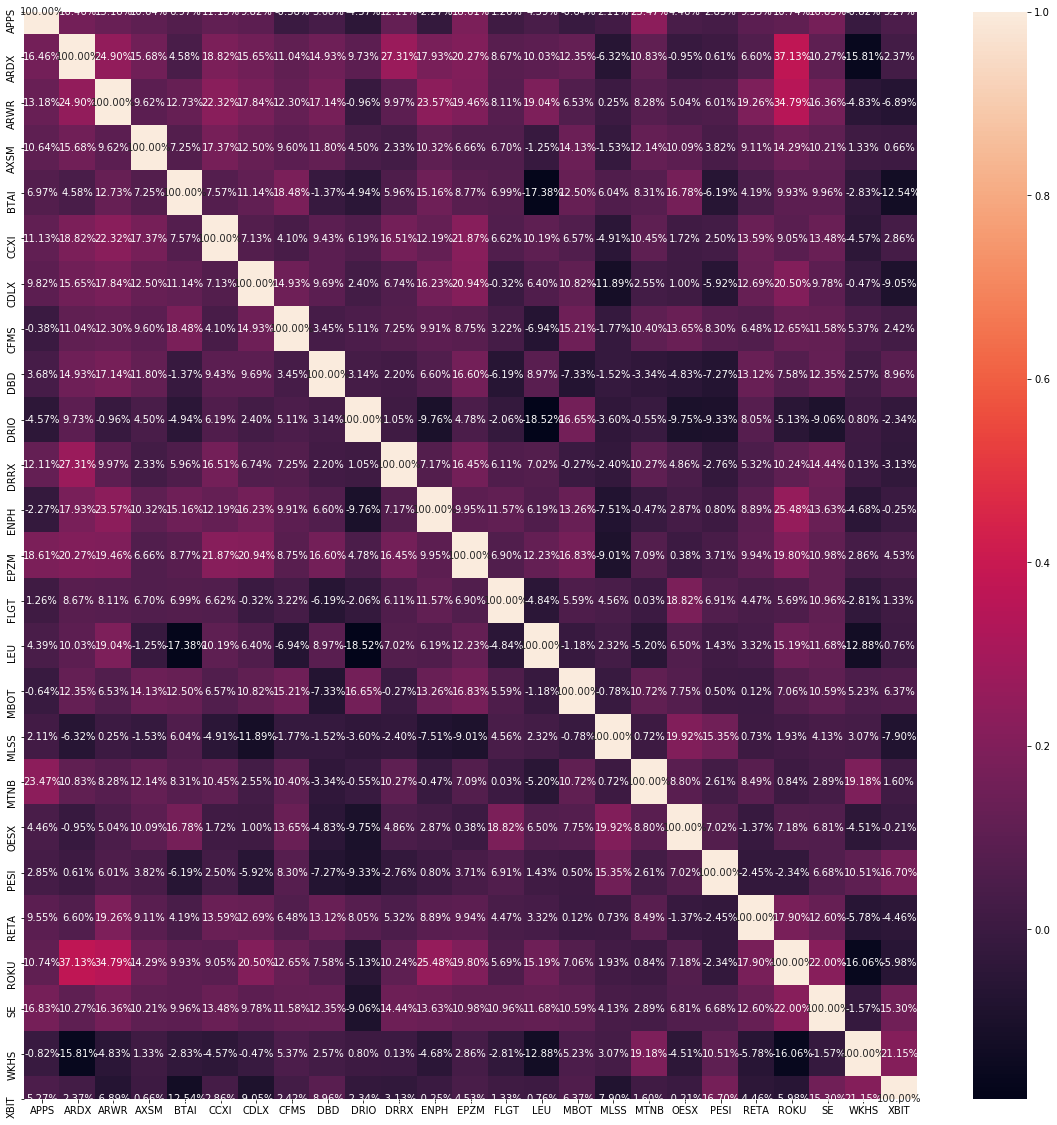

In [43]:
plt.subplots(figsize = (20, 20))
sns.heatmap(df_return.corr(), annot = True, fmt = '.2%')

In [44]:
# trying to see the returns if i invest $1 into each stock

In [45]:
df_1 = (df_return + 1).cumprod()
df_1

,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,DRIO,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.044693,1.021429,1.247312,0.968037,NaN,1.049153,NaN,1.004255,0.988506,1.000000,...,1.079208,1.072072,0.991935,0.977528,1.095890,0.993207,1.064721,1.037663,1.028985,1.030151
2018-01-04,1.039106,1.007143,1.303763,1.013699,NaN,1.462712,NaN,1.012766,0.971264,1.000000,...,1.039604,1.072072,0.983871,0.977528,1.095890,1.006793,0.984060,0.999231,1.039855,1.035176
2018-01-05,1.094972,1.014286,1.309140,1.022831,NaN,1.432203,NaN,1.055319,0.997126,1.006211,...,1.039604,1.036036,0.975806,0.977528,1.150685,0.968180,0.888804,1.067640,1.000000,1.055276
2018-01-08,1.094972,0.978571,1.223118,1.013699,NaN,1.484746,NaN,1.085106,1.048851,1.024845,...,1.069307,1.054054,1.064516,0.966292,1.123288,1.004290,0.911657,1.066103,1.061594,1.037688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.927374,0.240000,3.013441,0.401826,0.231188,1.677966,0.777861,0.171064,0.144828,0.521739,...,0.127393,0.270270,0.483871,0.617978,0.698630,1.787987,0.523910,0.825519,0.217391,1.575377
2018-12-24,0.932961,0.237143,2.887097,0.392694,0.252040,1.688136,0.785340,0.165957,0.145402,0.532919,...,0.109571,0.252252,0.475000,0.640449,0.632877,1.743296,0.521798,0.825519,0.216304,1.497487
2018-12-26,0.944134,0.248571,3.215054,0.374429,0.218495,1.793220,0.844428,0.158298,0.158046,0.501863,...,0.105611,0.261261,0.425806,0.629213,0.567123,1.894887,0.582869,0.875480,0.189130,1.296482


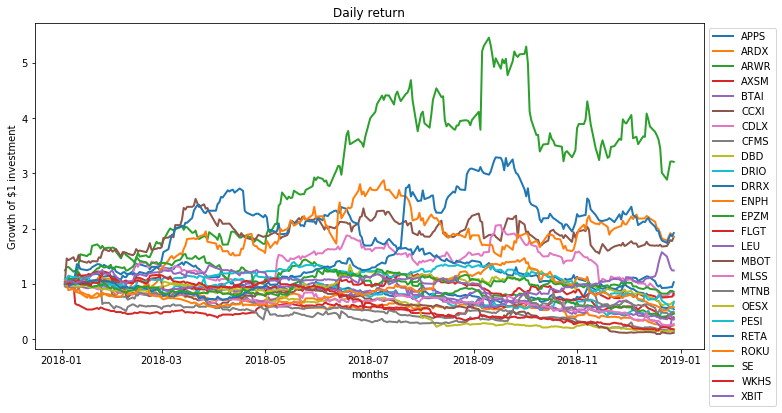

In [46]:
plt.figure(figsize = (12, 6))

for i in df_1.columns.values:
    plt.plot(df_1.index, df_1[i], lw = 2, label = i)
    
plt.title('Daily return')
plt.xlabel('months')
plt.ylabel('Growth of $1 investment')
plt.legend(df_1.columns.values, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()

In [47]:
# if i had ivested $1 into these stocks 
# at the beginning of the year i bought $1 worth of ARWR stock
# if i sold it around September - October i would make around $4 profit

In [48]:
# LSTM model

In [49]:
df.head()

,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,DRIO,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.79,7.00,3.72,5.475,NaN,5.90,NaN,2.35,17.400000,1.61,...,15.150000,1.11,1.24,0.89,3.65,27.969999,52.070000,13.01,2.76,3.98
2018-01-03,1.87,7.15,4.64,5.300,NaN,6.19,NaN,2.36,17.200001,1.61,...,16.350000,1.19,1.23,0.87,4.00,27.780001,55.439999,13.50,2.84,4.10
2018-01-04,1.86,7.05,4.85,5.550,NaN,8.63,NaN,2.38,16.900000,1.61,...,15.750000,1.19,1.22,0.87,4.00,28.160000,51.240002,13.00,2.87,4.12
2018-01-05,1.96,7.10,4.87,5.600,NaN,8.45,NaN,2.48,17.350000,1.62,...,15.750000,1.15,1.21,0.87,4.20,27.080000,46.279999,13.89,2.76,4.20
2018-01-08,1.96,6.85,4.55,5.550,NaN,8.76,NaN,2.55,18.250000,1.65,...,16.200001,1.17,1.32,0.86,4.10,28.090000,47.470001,13.87,2.93,4.13


In [50]:
df.isna().sum()

APPS     0
ARDX     0
ARWR     0
AXSM     0
BTAI    45
CCXI     0
CDLX    27
CFMS     0
DBD      0
DRIO     0
DRRX     0
ENPH     0
EPZM     0
FLGT     0
LEU      0
MBOT     0
MLSS     0
MTNB     0
OESX     0
PESI     0
RETA     0
ROKU     0
SE       0
WKHS     0
XBIT     0
dtype: int64

In [51]:
df.BTAI.fillna(df['BTAI'].mean(), inplace = True)
df.CDLX.fillna(df['CDLX'].mean(), inplace = True)

In [52]:
df.isna().sum()

APPS    0
ARDX    0
ARWR    0
AXSM    0
BTAI    0
CCXI    0
CDLX    0
CFMS    0
DBD     0
DRIO    0
DRRX    0
ENPH    0
EPZM    0
FLGT    0
LEU     0
MBOT    0
MLSS    0
MTNB    0
OESX    0
PESI    0
RETA    0
ROKU    0
SE      0
WKHS    0
XBIT    0
dtype: int64

In [53]:
df.head()

,APPS,ARDX,ARWR,AXSM,BTAI,CCXI,CDLX,CFMS,DBD,DRIO,...,MBOT,MLSS,MTNB,OESX,PESI,RETA,ROKU,SE,WKHS,XBIT
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.79,7.00,3.72,5.475,8.245107,5.90,18.683318,2.35,17.400000,1.61,...,15.150000,1.11,1.24,0.89,3.65,27.969999,52.070000,13.01,2.76,3.98
2018-01-03,1.87,7.15,4.64,5.300,8.245107,6.19,18.683318,2.36,17.200001,1.61,...,16.350000,1.19,1.23,0.87,4.00,27.780001,55.439999,13.50,2.84,4.10
2018-01-04,1.86,7.05,4.85,5.550,8.245107,8.63,18.683318,2.38,16.900000,1.61,...,15.750000,1.19,1.22,0.87,4.00,28.160000,51.240002,13.00,2.87,4.12
2018-01-05,1.96,7.10,4.87,5.600,8.245107,8.45,18.683318,2.48,17.350000,1.62,...,15.750000,1.15,1.21,0.87,4.20,27.080000,46.279999,13.89,2.76,4.20
2018-01-08,1.96,6.85,4.55,5.550,8.245107,8.76,18.683318,2.55,18.250000,1.65,...,16.200001,1.17,1.32,0.86,4.10,28.090000,47.470001,13.87,2.93,4.13


In [88]:
apps_df = yf.download('APPS', date_start, date_end)
apps_df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1.80,1.84,1.77,1.79,1.79,236700
2018-01-03,1.80,1.93,1.79,1.87,1.87,720600
2018-01-04,1.88,1.90,1.82,1.86,1.86,208900
2018-01-05,1.86,1.98,1.85,1.96,1.96,746200
2018-01-08,2.01,2.07,1.92,1.96,1.96,904600


In [82]:
apps_test = yf.download('APPS', date_start, date_end)

apps_test.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,1.80,1.84,1.77,1.79,1.79,236700
2018-01-03,1.80,1.93,1.79,1.87,1.87,720600
2018-01-04,1.88,1.90,1.82,1.86,1.86,208900
2018-01-05,1.86,1.98,1.85,1.96,1.96,746200
2018-01-08,2.01,2.07,1.92,1.96,1.96,904600


In [83]:
apps_test.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1.80,1.84,1.77,1.79,1.79,236700
1,2018-01-03,1.80,1.93,1.79,1.87,1.87,720600
2,2018-01-04,1.88,1.90,1.82,1.86,1.86,208900
3,2018-01-05,1.86,1.98,1.85,1.96,1.96,746200
4,2018-01-08,2.01,2.07,1.92,1.96,1.96,904600
...,...,...,...,...,...,...,...
245,2018-12-21,1.76,1.77,1.61,1.66,1.66,322100
246,2018-12-24,1.63,1.70,1.61,1.67,1.67,157100
247,2018-12-26,1.69,1.74,1.65,1.69,1.69,325500
248,2018-12-27,1.68,1.74,1.64,1.69,1.69,349100


In [89]:
apps_df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1.80,1.84,1.77,1.79,1.79,236700
1,2018-01-03,1.80,1.93,1.79,1.87,1.87,720600
2,2018-01-04,1.88,1.90,1.82,1.86,1.86,208900
3,2018-01-05,1.86,1.98,1.85,1.96,1.96,746200
4,2018-01-08,2.01,2.07,1.92,1.96,1.96,904600
...,...,...,...,...,...,...,...
245,2018-12-21,1.76,1.77,1.61,1.66,1.66,322100
246,2018-12-24,1.63,1.70,1.61,1.67,1.67,157100
247,2018-12-26,1.69,1.74,1.65,1.69,1.69,325500
248,2018-12-27,1.68,1.74,1.64,1.69,1.69,349100


In [90]:
df_apps = apps_df.iloc[:, 1:2].values

In [57]:
ss = MinMaxScaler(feature_range = (0, 1))
df_scaled = ss.fit_transform(df_apps)

In [62]:
df_scaled[100]

array([0.32352939])

In [65]:
# feature selection

x_train = []
y_train = []

for i in range(60, len(df_scaled)):
    x_train.append(df_scaled[i - 60: i, 0])
    y_train.append(df_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [67]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [68]:
x_train.shape

(190, 60, 1)

In [70]:
# LSTM model
model = Sequential()

# first layer
model.add(LSTM(units = 50, kernel_initializer = 'glorot_uniform', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# second layer
model.add(LSTM(units = 50, kernel_initializer = 'glorot_uniform', return_sequences = True))
model.add(Dropout(0.2))

# third layer
model.add(LSTM(units = 50, kernel_initializer = 'glorot_uniform', return_sequences = True))
model.add(Dropout(0.2))


# fourth layer without a return sequence
model.add(LSTM(units = 50, kernel_initializer = 'glorot_uniform'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1))

# compile
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the model
model.fit(x_train, y_train, batch_size = 30, epochs = 100)


Epoch 1/100
7/7 [==============================] - 6s 80ms/step - loss: 0.0709
Epoch 2/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0186
Epoch 3/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0173
Epoch 4/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0156
Epoch 5/100
7/7 [==============================] - 1s 78ms/step - loss: 0.0153
Epoch 6/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0129
Epoch 7/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0121
Epoch 8/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0134
Epoch 9/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0112
Epoch 10/100
7/7 [==============================] - 1s 79ms/step - loss: 0.0111
Epoch 11/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0120
Epoch 12/100
7/7 [==============================] - 1s 79ms/step - loss: 0.0103
Epoch 13/100
7/7 [==============================]

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)               

In [91]:
# predicting for test data
# concat the train and test data and take that last 60 values of the training set with the test set

test_open = apps_test.iloc[:, 1:2].values
total = pd.concat([apps_df['Open'], apps_test['Open']], axis = 0)
test_input = total[len(total)- len(apps_test)- 60:].values
test_input = test_input.reshape(-1, 1)
test_input = ss.transform(test_input)

In [103]:
xtest = []
for i in range(60, 250):
    xtest.append(test_input[i - 60: i, 0])

In [104]:
xtest = np.array(xtest)

In [105]:
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
predicted_value = model.predict(xtest)

In [106]:
predicted_value = ss.inverse_transform(predicted_value)

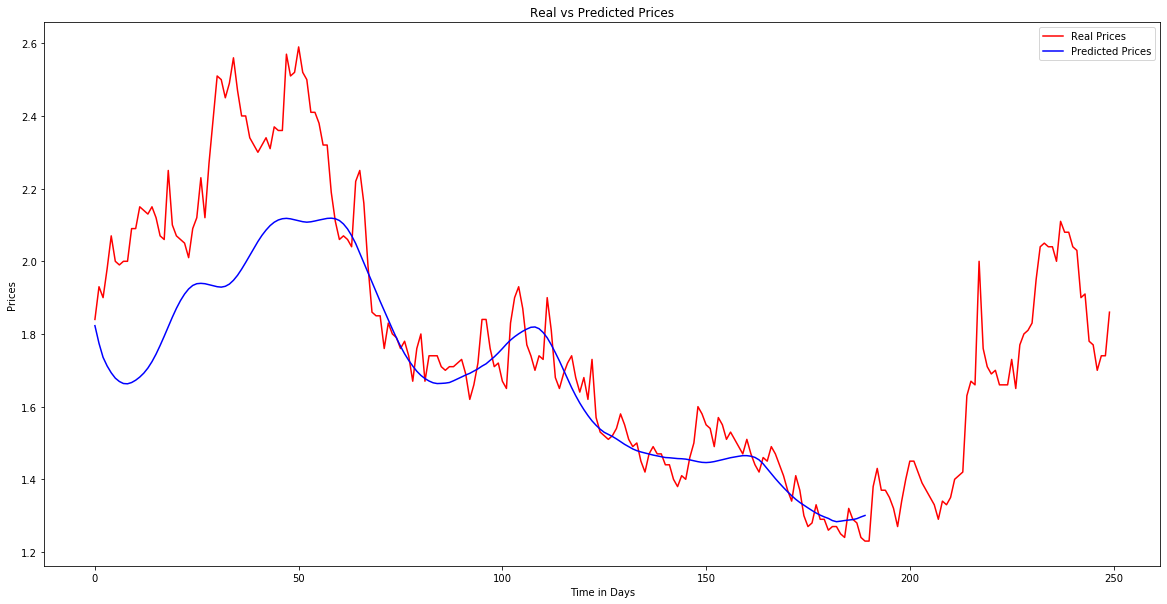

In [108]:
# PLotting data

plt.figure(figsize = (20, 10))
plt.plot(test_open, 'red', label = 'Real Prices')
plt.plot(predicted_value, 'blue', label = 'Predicted Prices')
plt.xlabel('Time in Days')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc = 'best')


In [117]:

def reg(optimizer):
     
    model = Sequential()

    #First Input layer 
    model.add(LSTM(units = 50, return_sequences = True, kernel_initializer = 'glorot_uniform',
                        input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(0.2))

    # Second LSTM 
    model.add(LSTM(units = 50, kernel_initializer = 'glorot_uniform', return_sequences = True))
    model.add(Dropout(0.2))

    #Third LSTM 
    model.add(LSTM(units = 50, kernel_initializer = 'glorot_uniform', return_sequences = True))
    model.add(Dropout(0.2))

    #Fourth LSTM 
    model.add(LSTM(units = 50, kernel_initializer = 'glorot_uniform'))
    model.add(Dropout(0.2))
    
    #Output layer
    model.add(Dense(units = 1))

    #Compile
    model.compile(optimizer = optimizer, loss = 'mean_squared_error')
    
    return model

model_2 = KerasRegressor(build_fn = reg)

In [118]:
# Gridsearch

parameters = {'batch_size': [50, 32],
             'epochs': [50, 25],
             'optimizer': ['adam', 'rmsprop', 'sgd']}

grid_search = RandomizedSearchCV(estimator = model_2, 
                                 param_distributions = parameters, 
                                 n_iter = 5)


grid_search = grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

Epoch 1/25
5/5 [==============================] - 5s 84ms/step - loss: 0.0835
Epoch 2/25
5/5 [==============================] - 0s 84ms/step - loss: 0.0433
Epoch 3/25
5/5 [==============================] - 0s 81ms/step - loss: 0.0345
Epoch 4/25
5/5 [==============================] - 0s 82ms/step - loss: 0.0279
Epoch 5/25
5/5 [==============================] - 0s 79ms/step - loss: 0.0292
Epoch 6/25
5/5 [==============================] - 0s 84ms/step - loss: 0.0302
Epoch 7/25
5/5 [==============================] - 0s 81ms/step - loss: 0.0263
Epoch 8/25
5/5 [==============================] - 0s 83ms/step - loss: 0.0254
Epoch 9/25
5/5 [==============================] - 0s 79ms/step - loss: 0.0250
Epoch 10/25
5/5 [==============================] - 0s 80ms/step - loss: 0.0282
Epoch 11/25
5/5 [==============================] - 0s 82ms/step - loss: 0.0279
Epoch 12/25
5/5 [==============================] - 0s 79ms/step - loss: 0.0248
Epoch 13/25
5/5 [==============================] - 0s 78ms/st

5/5 [==============================] - 5s 93ms/step - loss: 0.0764
Epoch 2/25
5/5 [==============================] - 1s 85ms/step - loss: 0.0369
Epoch 3/25
5/5 [==============================] - 0s 86ms/step - loss: 0.0306
Epoch 4/25
5/5 [==============================] - 0s 78ms/step - loss: 0.0236
Epoch 5/25
5/5 [==============================] - 0s 84ms/step - loss: 0.0290
Epoch 6/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0254
Epoch 7/25
5/5 [==============================] - 0s 78ms/step - loss: 0.0229
Epoch 8/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0233
Epoch 9/25
5/5 [==============================] - 0s 77ms/step - loss: 0.0236
Epoch 10/25
5/5 [==============================] - 0s 78ms/step - loss: 0.0213
Epoch 11/25
5/5 [==============================] - 0s 73ms/step - loss: 0.0208
Epoch 12/25
5/5 [==============================] - 0s 77ms/step - loss: 0.0218
Epoch 13/25
5/5 [==============================] - 0s 72ms/step - loss: 

Epoch 10/50
5/5 [==============================] - 0s 78ms/step - loss: 0.0310
Epoch 11/50
5/5 [==============================] - 0s 72ms/step - loss: 0.0304
Epoch 12/50
5/5 [==============================] - 0s 76ms/step - loss: 0.0289
Epoch 13/50
5/5 [==============================] - 0s 76ms/step - loss: 0.0303
Epoch 14/50
5/5 [==============================] - 0s 73ms/step - loss: 0.0303
Epoch 15/50
5/5 [==============================] - 0s 74ms/step - loss: 0.0298
Epoch 16/50
5/5 [==============================] - 0s 71ms/step - loss: 0.0267
Epoch 17/50
5/5 [==============================] - 0s 76ms/step - loss: 0.0302
Epoch 18/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0309
Epoch 19/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0257
Epoch 20/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0283
Epoch 21/50
5/5 [==============================] - 0s 74ms/step - loss: 0.0287
Epoch 22/50
5/5 [==============================] - 0

2/2 [==============================] - 1s 16ms/step - loss: 0.0141
Epoch 1/50
5/5 [==============================] - 6s 80ms/step - loss: 0.1183
Epoch 2/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0473
Epoch 3/50
5/5 [==============================] - 0s 78ms/step - loss: 0.0248
Epoch 4/50
5/5 [==============================] - 0s 77ms/step - loss: 0.0249
Epoch 5/50
5/5 [==============================] - 0s 72ms/step - loss: 0.0236
Epoch 6/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0198
Epoch 7/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0216
Epoch 8/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0215
Epoch 9/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0235
Epoch 10/50
5/5 [==============================] - 0s 73ms/step - loss: 0.0209
Epoch 11/50
5/5 [==============================] - 0s 76ms/step - loss: 0.0220
Epoch 12/50
5/5 [==============================] - 0s 74ms/step - loss: 0

Epoch 44/50
5/5 [==============================] - 0s 73ms/step - loss: 0.0162
Epoch 45/50
5/5 [==============================] - 0s 72ms/step - loss: 0.0186
Epoch 46/50
5/5 [==============================] - 0s 74ms/step - loss: 0.0187
Epoch 47/50
5/5 [==============================] - 0s 74ms/step - loss: 0.0173
Epoch 48/50
5/5 [==============================] - 0s 75ms/step - loss: 0.0152
Epoch 49/50
5/5 [==============================] - 0s 73ms/step - loss: 0.0156
Epoch 50/50
2/2 [==============================] - 1s 17ms/step - loss: 0.0554
Epoch 1/50
4/4 [==============================] - 5s 87ms/step - loss: 0.0781
Epoch 2/50
4/4 [==============================] - 0s 83ms/step - loss: 0.0235
Epoch 3/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0284
Epoch 4/50
4/4 [==============================] - 0s 84ms/step - loss: 0.0234
Epoch 5/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0243
Epoch 6/50
4/4 [==============================] - 0s 77ms

4/4 [==============================] - 0s 80ms/step - loss: 0.0088
Epoch 28/50
4/4 [==============================] - 0s 77ms/step - loss: 0.0096
Epoch 29/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0106
Epoch 30/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0116
Epoch 31/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0089
Epoch 32/50
4/4 [==============================] - 0s 77ms/step - loss: 0.0108
Epoch 33/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0099
Epoch 34/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0109
Epoch 35/50
4/4 [==============================] - 0s 77ms/step - loss: 0.0096
Epoch 36/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0103
Epoch 37/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0132
Epoch 38/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0092
Epoch 39/50
4/4 [==============================] - 0s 79ms/step 

4/4 [==============================] - 0s 89ms/step - loss: 0.0219
Epoch 11/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0151
Epoch 12/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0181
Epoch 13/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0142
Epoch 14/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0145
Epoch 15/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0142
Epoch 16/50
4/4 [==============================] - 0s 83ms/step - loss: 0.0133
Epoch 17/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0152
Epoch 18/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0123
Epoch 19/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0135
Epoch 20/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0116
Epoch 21/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0110
Epoch 22/50
4/4 [==============================] - 0s 77ms/step 

1/1 [==============================] - 1s 1s/step - loss: 0.0519
Epoch 1/25
5/5 [==============================] - 6s 83ms/step - loss: 0.0653
Epoch 2/25
5/5 [==============================] - 0s 74ms/step - loss: 0.0240
Epoch 3/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0184
Epoch 4/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0238
Epoch 5/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0166
Epoch 6/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0188
Epoch 7/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0185
Epoch 8/25
5/5 [==============================] - 0s 77ms/step - loss: 0.0129
Epoch 9/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0191
Epoch 10/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0191
Epoch 11/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0122
Epoch 12/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0

2/2 [==============================] - 2s 18ms/step - loss: 0.0041
Epoch 1/25
5/5 [==============================] - 5s 82ms/step - loss: 0.0988
Epoch 2/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0211
Epoch 3/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0183
Epoch 4/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0136
Epoch 5/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0230
Epoch 6/25
5/5 [==============================] - 0s 78ms/step - loss: 0.0165
Epoch 7/25
5/5 [==============================] - 0s 75ms/step - loss: 0.0158
Epoch 8/25
5/5 [==============================] - 0s 78ms/step - loss: 0.0167
Epoch 9/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0127
Epoch 10/25
5/5 [==============================] - 0s 76ms/step - loss: 0.0227
Epoch 11/25
5/5 [==============================] - 0s 74ms/step - loss: 0.0173
Epoch 12/25
5/5 [==============================] - 0s 72ms/step - loss: 0

Epoch 34/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0104
Epoch 35/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0113
Epoch 36/50
4/4 [==============================] - 0s 95ms/step - loss: 0.0101
Epoch 37/50
4/4 [==============================] - 0s 83ms/step - loss: 0.0095
Epoch 38/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0100
Epoch 39/50
4/4 [==============================] - 0s 87ms/step - loss: 0.0127
Epoch 40/50
4/4 [==============================] - 0s 83ms/step - loss: 0.0088
Epoch 41/50
4/4 [==============================] - 0s 83ms/step - loss: 0.0073
Epoch 42/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0138
Epoch 43/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0105
Epoch 44/50
4/4 [==============================] - 0s 76ms/step - loss: 0.0148
Epoch 45/50
4/4 [==============================] - 0s 77ms/step - loss: 0.0120
Epoch 46/50
4/4 [==============================] - 0

4/4 [==============================] - 0s 78ms/step - loss: 0.0161
Epoch 18/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0390
Epoch 19/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0141
Epoch 20/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0144
Epoch 21/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0202
Epoch 22/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0130
Epoch 23/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0119
Epoch 24/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0133
Epoch 25/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0094
Epoch 26/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0250
Epoch 27/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0104
Epoch 28/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0259
Epoch 29/50
4/4 [==============================] - 0s 80ms/step 

1/1 [==============================] - 1s 1s/step - loss: 0.0229
Epoch 1/50
4/4 [==============================] - 5s 89ms/step - loss: 0.0625
Epoch 2/50
4/4 [==============================] - 0s 77ms/step - loss: 0.0154
Epoch 3/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0127
Epoch 4/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0189
Epoch 5/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0120
Epoch 6/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0104
Epoch 7/50
4/4 [==============================] - 0s 80ms/step - loss: 0.0097
Epoch 8/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0105
Epoch 9/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0103
Epoch 10/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0057
Epoch 11/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0143
Epoch 12/50
4/4 [==============================] - 0s 78ms/step - loss: 0.0

4/4 [==============================] - 0s 83ms/step - loss: 0.0075
Epoch 45/50
4/4 [==============================] - 0s 79ms/step - loss: 0.0090
Epoch 46/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0094
Epoch 47/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0079
Epoch 48/50
4/4 [==============================] - 0s 87ms/step - loss: 0.0083
Epoch 49/50
4/4 [==============================] - 0s 81ms/step - loss: 0.0103
Epoch 50/50
4/4 [==============================] - 0s 82ms/step - loss: 0.0103


In [119]:
model_3 = grid_search.best_estimator_.fit(x_train, y_train)

Epoch 1/50
4/4 [==============================] - 5s 94ms/step - loss: 0.0726
Epoch 2/50
4/4 [==============================] - 0s 90ms/step - loss: 0.0177
Epoch 3/50
4/4 [==============================] - 0s 92ms/step - loss: 0.0259
Epoch 4/50
4/4 [==============================] - 0s 83ms/step - loss: 0.0161
Epoch 5/50
4/4 [==============================] - 0s 91ms/step - loss: 0.0151
Epoch 6/50
4/4 [==============================] - 0s 91ms/step - loss: 0.0133
Epoch 7/50
4/4 [==============================] - 0s 89ms/step - loss: 0.0195
Epoch 8/50
4/4 [==============================] - 0s 91ms/step - loss: 0.0180
Epoch 9/50
4/4 [==============================] - 0s 89ms/step - loss: 0.0133
Epoch 10/50
4/4 [==============================] - 0s 89ms/step - loss: 0.0134
Epoch 11/50
4/4 [==============================] - 0s 87ms/step - loss: 0.0157
Epoch 12/50
4/4 [==============================] - 0s 88ms/step - loss: 0.0135
Epoch 13/50
4/4 [==============================] - 0s 88ms/st

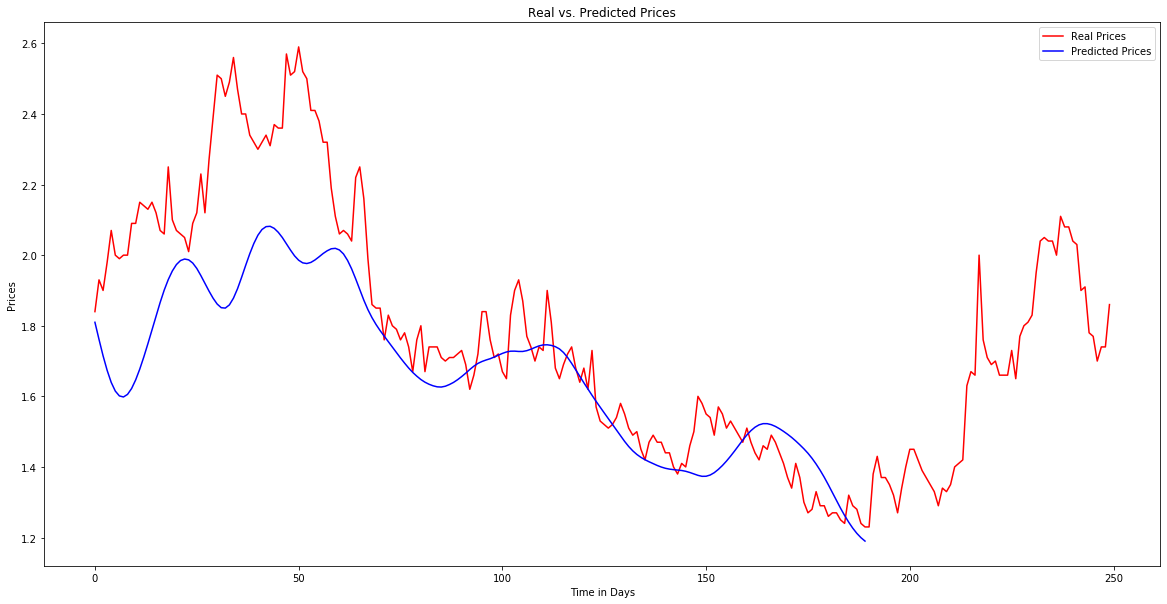

In [120]:
predicted_value = grid_search.predict(xtest)
predicted_value = ss.inverse_transform(predicted_value.reshape(-1, 1))

plt.figure(figsize = (20, 10))
plt.plot(test_open, 'red', label = 'Real Prices')
plt.plot(predicted_value, 'blue', label = 'Predicted Prices')
plt.xlabel('Time in Days')
plt.ylabel('Prices')
plt.title('Real vs. Predicted Prices')
plt.legend(loc = 'best')

In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)               